In [1]:
import pandas as pd
import numpy as np

# Specify relative path to the file
file_path = "../IAPS/banco_completo.csv"
daf = pd.read_csv(file_path, sep=';', encoding='ISO-8859-1')



In [16]:
pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
daf

,ID,dt_nasc,sexo,racacor,dt_obito,causabas,qt_apac,qt_aih,obito,obito_internacao,...,regiao_pcn,macro_pcn,estabel_saude,cidade_estabel,estado_estabel,regiao_estabel,macro_estabel,regiao_bras_estabel,finaliquimio,finaliradio
0,62980,02/05/1957,M,3,22/12/2014,C349,1,4,1,1.0,...,Belo Horizonte,Centro,SANTA CASA DE BELO HORIZONTE,Belo Horizonte,MG,Belo Horizonte,Centro,Sudeste,NaN,NaN
1,402050,04/07/1960,M,1,06/06/2012,C349,2,2,1,1.0,...,Frutal,Triângulo do Sul,FUNDACAO PIO XII BARRETOS,BARRETOS,SP,Outros Estados,Outros Estados,Sudeste,Paliativa,NaN
2,605650,20/03/1950,M,1,14/10/2014,C349,2,8,1,1.0,...,Belo Horizonte,Centro,ASSOCIACAO MARIO PENNA,Belo Horizonte,MG,Belo Horizonte,Centro,Sudeste,Demais,NaN
3,1162820,07/06/1937,F,1,11/02/2014,C349,1,1,1,NaN,...,Sete Lagoas,Centro,HOSPITAL FELICIO ROCHO,Belo Horizonte,MG,Belo Horizonte,Centro,Sudeste,Paliativa,NaN
4,1279111,30/12/1939,M,99,21/03/2009,C349,4,1,1,1.0,...,Juiz de Fora,Sudeste,HOSPITAL MARIA JOSE BAETA REIS ASCOMCER,Juiz de Fora,MG,Juiz de Fora,Sudeste,Sudeste,Demais,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4784,999248701,01/08/1952,M,1,NaN,NaN,2,0,0,NaN,...,Uberaba,Triângulo do Sul,HOSPITAL DOUTOR HELIO ANGOTTI,Uberaba,MG,Uberaba,Triângulo do Sul,Sudeste,Paliativa,NaN
4785,999359850,30/07/1953,M,3,16/06/2013,C349,1,2,1,NaN,...,Ubá,Sudeste,HOSPITAL DO CANCER DE MURIAE,Muriaé,MG,Muriaé,Sudeste,Sudeste,Paliativa,NaN
4786,999364940,27/08/1940,M,1,17/03/2009,C349,5,0,1,NaN,...,Poços de Caldas,Sul,FUNDACAO PIO XII BARRETOS,BARRETOS,SP,Outros Estados,Outros Estados,Sudeste,Demais,NaN
4787,999442190,12/02/1937,M,1,12/02/2014,C349,4,3,1,1.0,...,Ponte Nova,Leste do Sul,HOSPITAL FELICIO ROCHO,Belo Horizonte,MG,Belo Horizonte,Centro,Sudeste,NaN,Demais


In [3]:
import re

# Function to check if a value looks like a date
def is_date_format(value):
    # Regular expression pattern to match date format dd/mm/yyyy
    pattern = r"\d{2}/\d{2}/\d{4}"
    if re.match(pattern, str(value)):
        return True
    return False

# Identify columns to drop based on date format or 'ID' in column name
cols_to_drop = [col for col in daf.columns if any(daf[col].apply(is_date_format)) or 'ID' in col.upper() or 'obito_internacao' in col or 'qt_obito_simaih' in col]

# Drop identified columns
daf.drop(columns=cols_to_drop, inplace=True)



In [ ]:
print(daf.columns)

In [ ]:
# List of categorical columns
categorical_columns = [
    'sexo', 'racacor', 'causabas', 'estadio', 'tipo_proc_min', 'proc_max', 
    'desc_f_org_tto_min', 'tipo_tto_min', 'perfil', 'estadio_rec',
    'f_org_tto_min_rec', 'perfil_rec', 'causabas_simaih_rec', 'causabas_simaih_rec_agrup',
    'causabas_simaih_rec_agrup2', 'cir_proc_tto_min_rec', 'cir_proc_tto_min_rec2',
    'cump_lei60dias', 'macro_tto', 'mun_pcn', 'regiao_pcn', 'macro_pcn', 'estabel_saude', 
    'estado_estabel', 'regiao_estabel', 'macro_estabel', 'regiao_bras_estabel', 'finaliquimio',
    'finaliradio', 'time_diag'
]

# Convert categorical column names to lowercase
daf.columns = [col.lower() if col in categorical_columns else col for col in daf.columns]

# List of numeric columns
numeric_columns = [
    'qt_apac', 'qt_aih', 'n_comorb', 'tempo_diag_tto_min', 'tempo_internacao', 'tempo_coorte'
]

# Convert numeric column names to uppercase
daf.columns = [col.upper() if col in numeric_columns else col for col in daf.columns]


In [ ]:
daf

Analysis for column: qt_apac
count    4789.000000
mean        0.696179
std         0.459954
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: qt_apac, dtype: float64


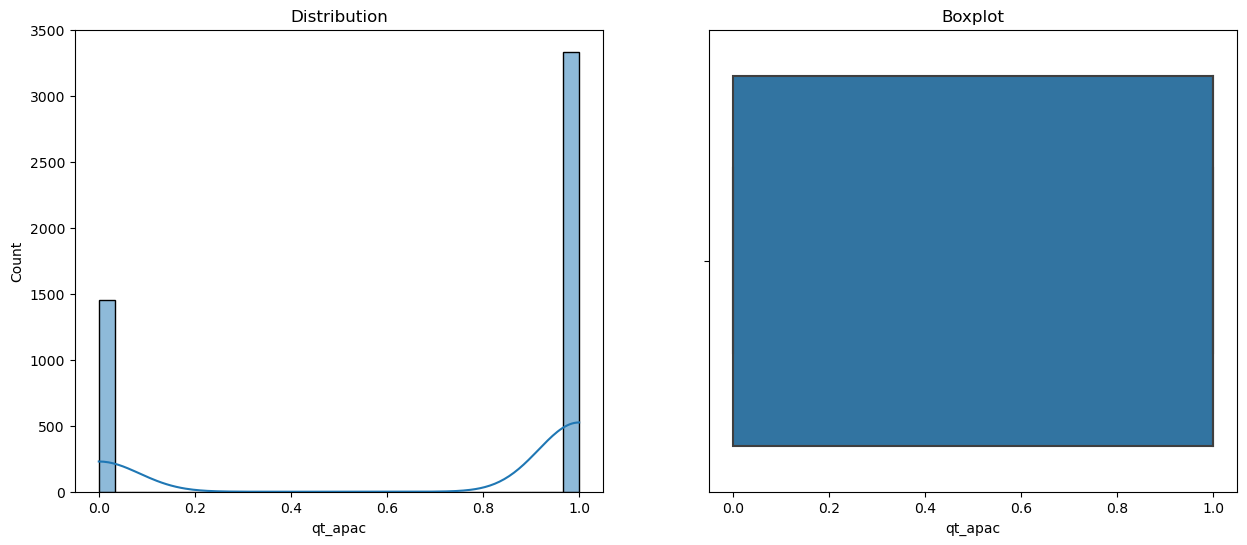

Number of unique values: 2
Unique values for qt_apac: [0. 1.]

--------------------------------------------------

Analysis for column: qt_aih
count    4789.000000
mean        0.691167
std         0.462060
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: qt_aih, dtype: float64


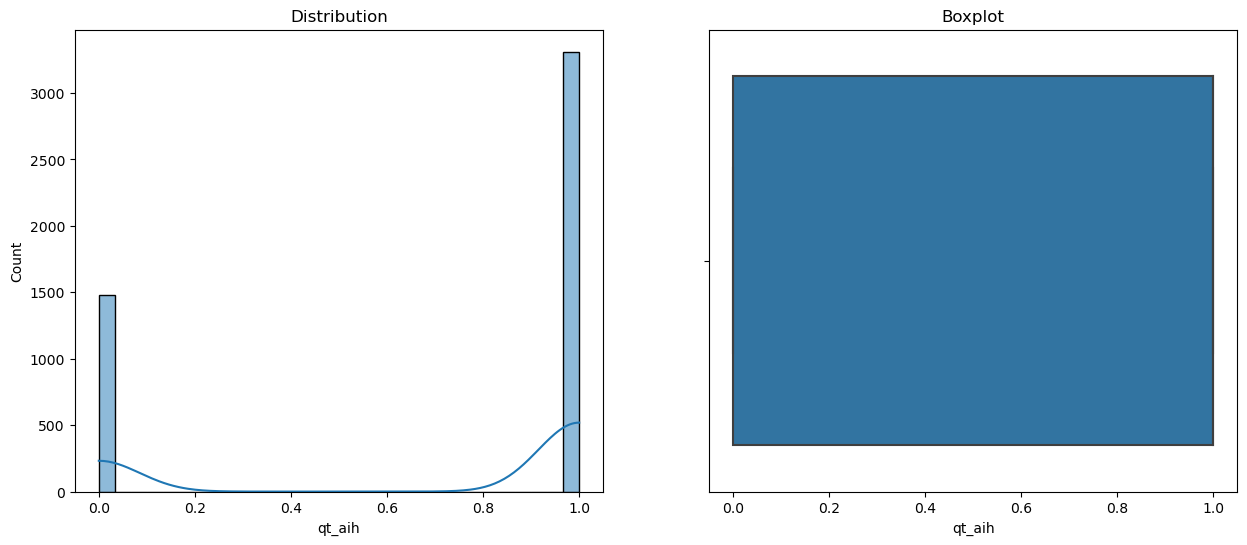

Number of unique values: 2
Unique values for qt_aih: [1. 0.]

--------------------------------------------------

Analysis for column: n_comorb
count    4789.000000
mean        0.908332
std         0.288587
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: n_comorb, dtype: float64


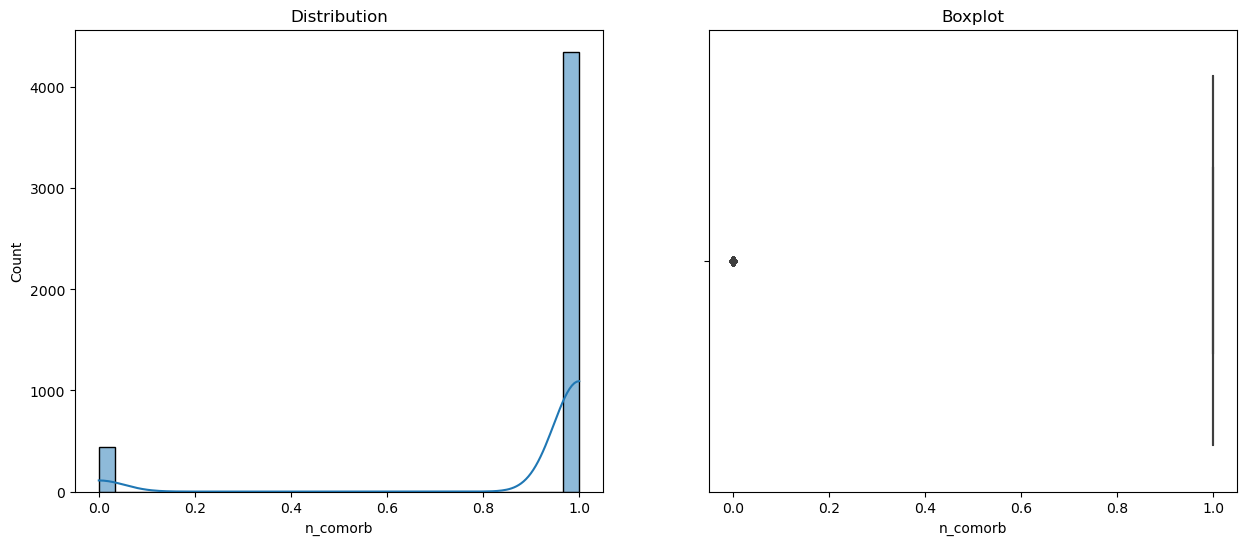

Number of unique values: 2
Unique values for n_comorb: [1. 0.]

--------------------------------------------------

Analysis for column: tempo_diag_tto_min
count    4789.000000
mean        0.802882
std         0.397864
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: tempo_diag_tto_min, dtype: float64


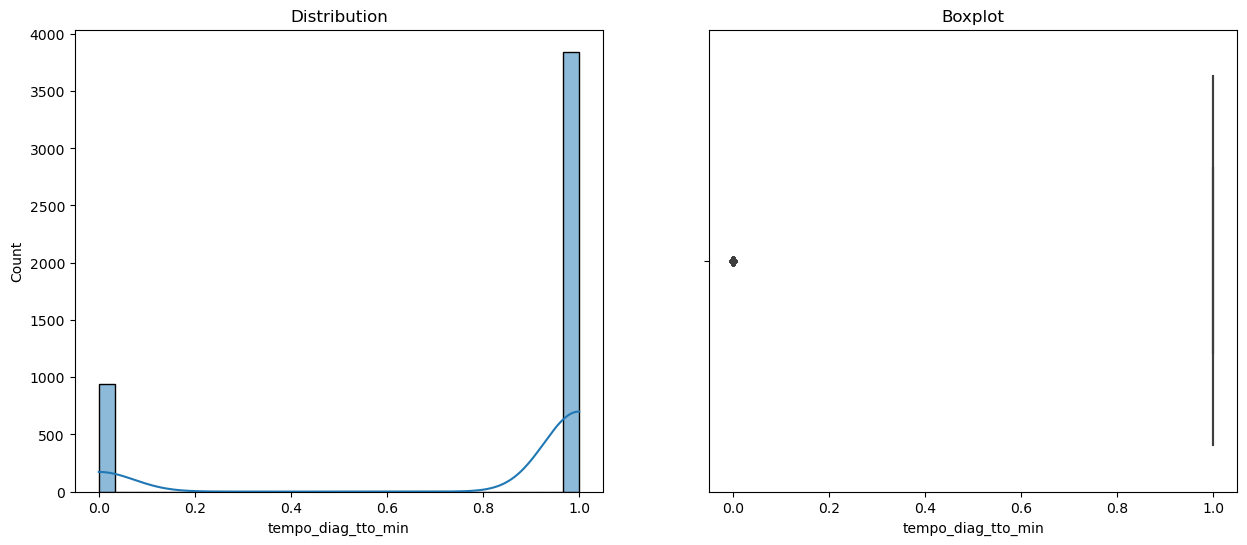

Number of unique values: 2
Unique values for tempo_diag_tto_min: [0. 1.]

--------------------------------------------------

Analysis for column: tempo_internacao
count    4789.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: tempo_internacao, dtype: float64


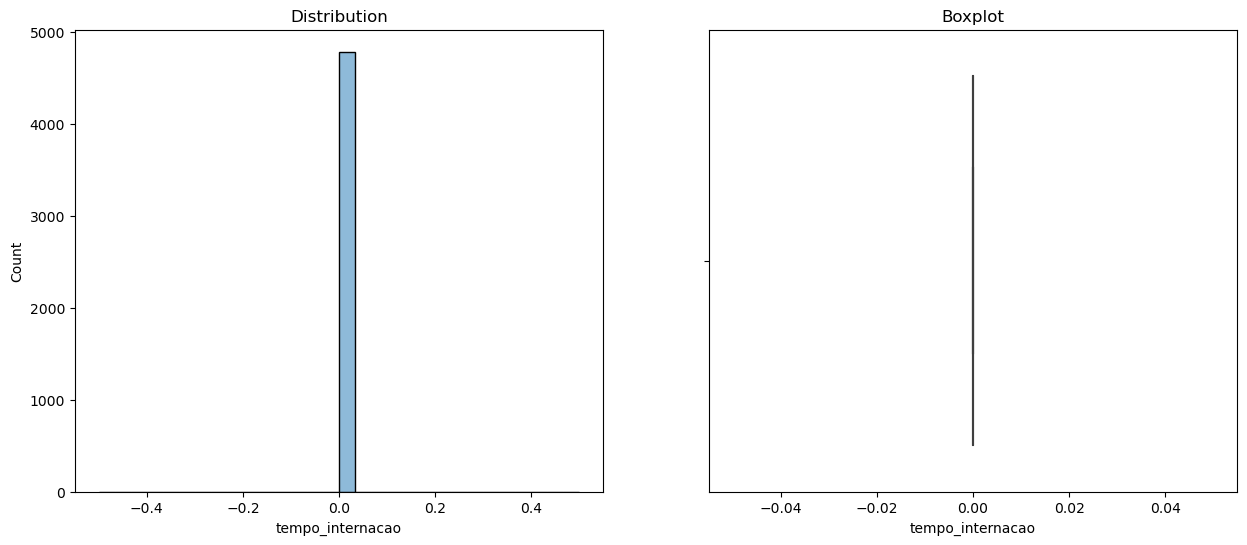

Number of unique values: 1
Unique values for tempo_internacao: [0.]

--------------------------------------------------

Analysis for column: tempo_coorte
count    4789.000000
mean        0.891000
std         0.311671
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: tempo_coorte, dtype: float64


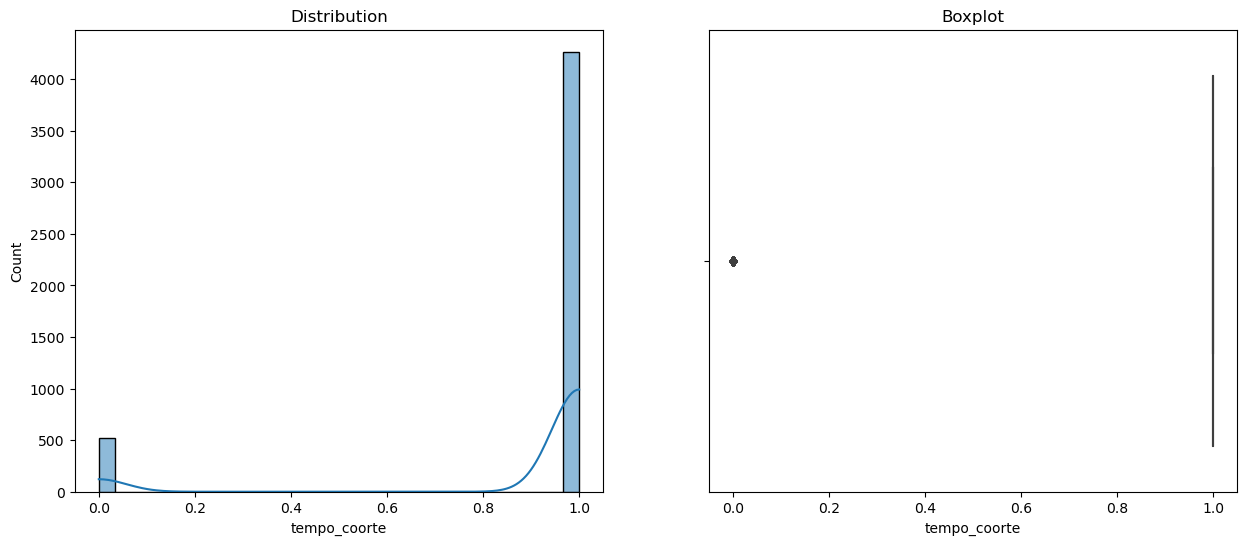

Number of unique values: 2
Unique values for tempo_coorte: [1. 0.]

--------------------------------------------------



In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['qt_apac', 'qt_aih', 'n_comorb', 'tempo_diag_tto_min', 'tempo_internacao', 'tempo_coorte']

# Inspecting each numeric variable
for col in numeric_cols:
    print(f"Analysis for column: {col}")
    print(daf[col].describe())
    
    plt.figure(figsize=(15, 6))

    # Distribution plot
    plt.subplot(1, 2, 1)
    sns.histplot(daf[col], bins=30, kde=True)
    plt.title('Distribution')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=daf[col])
    plt.title('Boxplot')
    
    plt.show()

    # Number of unique values
    num_unique = daf[col].nunique()
    print(f"Number of unique values: {num_unique}")
    
    if num_unique < 10:
        print(f"Unique values for {col}: {daf[col].unique()}")
    
    print("\n" + "-"*50 + "\n")


In [10]:
categorical_cols = [
    'sexo', 'racacor', 'causabas', 'estadio', 'tipo_proc_min', 'proc_max', 
    'desc_f_org_tto_min', 'tipo_tto_min', 'perfil', 'estadio_rec',
    'f_org_tto_min_rec', 'perfil_rec', 'causabas_simaih_rec', 'causabas_simaih_rec_agrup',
    'causabas_simaih_rec_agrup2', 'cir_proc_tto_min_rec', 'cir_proc_tto_min_rec2',
    'cump_lei60dias', 'macro_tto', 'mun_pcn', 'regiao_pcn', 'macro_pcn', 'estabel_saude', 
    'estado_estabel', 'regiao_estabel', 'macro_estabel', 'regiao_bras_estabel', 'finaliquimio',
    'finaliradio', 'time_diag'
] # and other columns
for col in categorical_cols:
    daf[col] = daf[col].astype('category')


In [11]:
from sklearn.model_selection import train_test_split

# Use 80% of the data for training and 20% for testing
train, test = train_test_split(daf, test_size=0.2, random_state=42, stratify=daf['obito'])


In [20]:
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.models import BayesianModel
from pgmpy.estimators import ParameterEstimator, MaximumLikelihoodEstimator

bic = BicScore(train)

# Initialize HillClimbSearch with just the data
hc = HillClimbSearch(train)

# Estimate the model
best_model = hc.estimate(scoring_method=bic)

# Print edges
print(best_model.edges())

# Learn the parameters
model = BayesianModel(best_model.edges())
model.fit(train, estimator=MaximumLikelihoodEstimator)




[('causabas', 'obito'), ('qt_apac', 'tempo_coorte'), ('qt_apac', 'time_diag'), ('qt_aih', 'n_comorb'), ('obito', 'sexo'), ('estadio', 'finaliquimio'), ('estadio', 'finaliradio'), ('tipo_proc_min', 'qt_aih'), ('desc_f_org_tto_min', 'f_org_tto_min_rec'), ('tipo_tto_min', 'tipo_proc_min'), ('tipo_tto_min', 'cir_proc_tto_min_rec2'), ('tempo_diag_tto_min', 'regiao_estabel'), ('tempo_coorte', 'causabas_simaih_rec_agrup'), ('perfil', 'perfil_rec'), ('estadio_rec', 'estadio'), ('f_org_tto_min_rec', 'tipo_tto_min'), ('f_org_tto_min_rec', 'finaliradio'), ('f_org_tto_min_rec', 'perfil'), ('perfil_rec', 'qt_apac'), ('causabas_simaih_rec_agrup', 'causabas_simaih_rec'), ('causabas_simaih_rec_agrup', 'causabas_simaih_rec_agrup2'), ('causabas_simaih_rec_agrup2', 'causabas'), ('causabas_simaih_rec_agrup2', 'qt_aih'), ('causabas_simaih_rec_agrup2', 'time_diag'), ('causabas_simaih_rec_agrup2', 'n_comorb'), ('cir_proc_tto_min_rec2', 'cir_proc_tto_min_rec'), ('cump_lei60dias', 'tempo_diag_tto_min'), ('cum

/Users/paulomelo/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [21]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator

# Define the structure
model = BayesianModel(
[('causabas', 'obito'), ('qt_apac', 'tempo_coorte'), ('qt_apac', 'time_diag'), ('qt_aih', 'n_comorb'), ('obito', 'sexo'), ('estadio', 'finaliquimio'), ('estadio', 'finaliradio'), ('tipo_proc_min', 'qt_aih'), ('desc_f_org_tto_min', 'f_org_tto_min_rec'), ('tipo_tto_min', 'tipo_proc_min'), ('tipo_tto_min', 'cir_proc_tto_min_rec2'), ('tempo_diag_tto_min', 'regiao_estabel'), ('tempo_coorte', 'causabas_simaih_rec_agrup'), ('perfil', 'perfil_rec'), ('estadio_rec', 'estadio'), ('f_org_tto_min_rec', 'tipo_tto_min'), ('f_org_tto_min_rec', 'finaliradio'), ('f_org_tto_min_rec', 'perfil'), ('perfil_rec', 'qt_apac'), ('causabas_simaih_rec_agrup', 'causabas_simaih_rec'), ('causabas_simaih_rec_agrup', 'causabas_simaih_rec_agrup2'), ('causabas_simaih_rec_agrup2', 'causabas'), ('causabas_simaih_rec_agrup2', 'qt_aih'), ('causabas_simaih_rec_agrup2', 'time_diag'), ('causabas_simaih_rec_agrup2', 'n_comorb'), ('cir_proc_tto_min_rec2', 'cir_proc_tto_min_rec'), ('cump_lei60dias', 'tempo_diag_tto_min'), ('cump_lei60dias', 'tempo_coorte'), ('regiao_pcn', 'macro_tto'), ('macro_pcn', 'regiao_pcn'), ('estado_estabel', 'regiao_bras_estabel'), ('regiao_estabel', 'macro_estabel'), ('regiao_estabel', 'racacor'), ('macro_estabel', 'macro_pcn'), ('macro_estabel', 'estabel_saude'), ('macro_estabel', 'estado_estabel'), ('macro_estabel', 'estadio_rec'), ('finaliquimio', 'desc_f_org_tto_min'), ('finaliquimio', 'proc_max')])  # ... represent the other edges

# Learn CPDs using Maximum Likelihood Estimators
model.fit(train, estimator=MaximumLikelihoodEstimator)

# Check the learned CPDs
for cpd in model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)

/Users/paulomelo/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


CPD of causabas:
+----------------------------+-----+-------------------------------+
| causabas_simaih_rec_agrup2 | ... | causabas_simaih_rec_agrup2(2) |
+----------------------------+-----+-------------------------------+
| causabas(0)                | ... | 0.0                           |
+----------------------------+-----+-------------------------------+
| causabas(1)                | ... | 0.0                           |
+----------------------------+-----+-------------------------------+
| causabas(2)                | ... | 0.0                           |
+----------------------------+-----+-------------------------------+
| causabas(3)                | ... | 0.0                           |
+----------------------------+-----+-------------------------------+
| causabas(4)                | ... | 0.0                           |
+----------------------------+-----+-------------------------------+
| causabas(5)                | ... | 0.0                           |
+----------------

In [25]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)

# Assuming test_data is your test dataset
predicted_values = []


for index, row in test.iterrows():
    # This is just a hypothetical example, you'll have to choose the right evidence variables from your data.
    evidence = {'qt_apac': row['qt_apac'], 'tempo_coorte': row['tempo_coorte']}
    
    prediction = infer.query(variables=['obito'], evidence=evidence)
    
    # Extract the most likely state of 'obito' from the DiscreteFactor object
    predicted_state = prediction.state_names['obito'][np.argmax(prediction.values)]
    predicted_values.append(predicted_state)


In [27]:
actual_values = test['obito'].tolist()


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(actual_values, predicted_values)
precision = precision_score(actual_values, predicted_values, average='weighted')  # for multi-class
recall = recall_score(actual_values, predicted_values, average='weighted')        # for multi-class
f1 = f1_score(actual_values, predicted_values, average='weighted')                # for multi-class
conf_matrix = confusion_matrix(actual_values, predicted_values)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.6899791231732777
Precision: 0.4760711904149651
Recall: 0.6899791231732777
F1 Score: 0.5634048183045541
Confusion Matrix:
[[  0 297]
 [  0 661]]


/Users/paulomelo/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
